In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(7)

In [3]:
uri = "Data/base_de_dados.xlsx"
xls = pd.ExcelFile(uri)

In [4]:
len(variaveis_65)

NameError: name 'variaveis_65' is not defined

In [6]:
variaveis_65 = ['TSM-AS5(0)', 'TSM-AS6(0)', 'TSM-AS28(0)', 'TSM-AS34(0)', 'TSM-AS5(1)', 'TSM-AS6(1)', 'TSM-AS28(1)', 'TSM-AS34(1)',
'TSM-AS5(2)', 'TSM-AS6(2)', 'TSM-AS28(2)', 'TSM-AS34(2)','TSM-AS5(3)', 'TSM-AS6(3)', 'TSM-AS28(3)', 'TSM-AS34(3)',
'TSM-AS5(4)', 'TSM-AS6(4)', 'TSM-AS28(4)', 'TSM-AS34(4)','TSM-AS5(5)', 'TSM-AS6(5)', 'TSM-AS28(5)', 'TSM-AS34(5)',
'TSM-AS5(6)', 'TSM-AS6(6)', 'TSM-AS28(6)', 'TSM-AS34(6)', 'TSM-AS5(7)', 'TSM-AS6(7)', 'TSM-AS28(7)', 'TSM-AS34(7)',
'TSM-AS5(8)', 'TSM-AS6(8)', 'TSM-AS28(8)', 'TSM-AS34(8)','TSM-AS5(9)', 'TSM-AS6(9)', 'TSM-AS28(9)', 'TSM-AS34(9)',
'TSM-AS5(10)', 'TSM-AS6(10)', 'TSM-AS28(10)', 'TSM-AS34(10)', 'TSM-AS5(11)', 'TSM-AS6(11)', 'TSM-AS28(11)', 'TSM-AS34(11)',
'TSM-AS5(12)', 'TSM-AS6(12)', 'TSM-AS28(12)', 'TSM-AS34(12)']

data = {}

for r in variaveis_65:
    data[r] = pd.read_excel(xls, sheet_name="Variável"+r)

    
    
list(data.keys())
for i in range(len(data.keys())):
    index = list(data.keys())[i]
    data[index] = data[index].drop(columns=['Unnamed: 0'])
    data[index].columns = ['TSM', 'PRM']
    print(data[index].columns[0])
#data[list(data.keys())[2]]

TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM
TSM


In [7]:
join = []

for ls in range(len(data.keys())):
    if ls > 0:
        k = list(data.keys())[ls] 
        join.append(data[k])
        
dataset = data[list(data.keys())[0]].append(join)
dataset

,TSM,PRM
0,27.1885,317.08700
1,27.9953,201.64900
2,28.6357,163.90100
3,28.2180,105.00500
4,26.8327,30.43930
...,...,...
450,18.5150,7.22894
451,18.7358,13.02310
452,18.5751,41.58150
453,19.7920,166.06100


In [8]:
X = dataset['TSM']
y= dataset['PRM']

In [130]:
X

0      27.1885
1      27.9953
2      28.6357
3      28.2180
4      26.8327
        ...   
450    18.5150
451    18.7358
452    18.5751
453    19.7920
454    21.8815
Name: TSM, Length: 23972, dtype: float64

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale

scaler = MinMaxScaler(feature_range=(0, 1))
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [128]:
X

array([[0.80012452],
       [0.86452272],
       [0.91563899],
       ...,
       [0.11260905],
       [0.20974115],
       [0.37652355]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = X_train.reshape(-1,1,1)
y_train = y_train.reshape(-1,1,1)

X_test = X_test.reshape(-1,1,1)
y_test = y_test.reshape(-1,1,1)

In [11]:
len(X_train), len(y_train)

(16780, 16780)

In [14]:
saidas = 1

model = Sequential()
model.add(LSTM(saidas, input_shape=(1, 1), activation='sigmoid', recurrent_activation='tanh'))
model.add(Dense(4))
model.add(Dense(2))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])
print(model.summary())





#history = model.fit(X_train,y_train,epochs=EPOCHS,shuffle=True,batch_size=2,verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = model.fit(X_train,y_train,epochs=150,shuffle=True,batch_size=2,verbose=2)

Epoch 1/150
8390/8390 - 8s - loss: 0.1790 - mse: 0.0520 - mae: 0.1790 - mape: 400701.1250
Epoch 2/150
8390/8390 - 7s - loss: 0.1688 - mse: 0.0460 - mae: 0.1688 - mape: 353502.2500
Epoch 3/150
8390/8390 - 7s - loss: 0.1676 - mse: 0.0459 - mae: 0.1676 - mape: 346285.7812
Epoch 4/150
8390/8390 - 7s - loss: 0.1669 - mse: 0.0458 - mae: 0.1669 - mape: 342466.2188
Epoch 5/150
8390/8390 - 7s - loss: 0.1657 - mse: 0.0458 - mae: 0.1657 - mape: 323525.3438
Epoch 6/150
8390/8390 - 7s - loss: 0.1643 - mse: 0.0459 - mae: 0.1643 - mape: 309088.9688
Epoch 7/150
8390/8390 - 7s - loss: 0.1633 - mse: 0.0464 - mae: 0.1633 - mape: 297372.6562
Epoch 8/150
8390/8390 - 7s - loss: 0.1626 - mse: 0.0465 - mae: 0.1626 - mape: 315423.5312
Epoch 9/150
8390/8390 - 7s - loss: 0.1626 - mse: 0.0466 - mae: 0.1626 - mape: 310873.0000
Epoch 10/150
8390/8390 - 7s - loss: 0.1626 - mse: 0.0465 - mae: 0.1626 - mape: 300760.8438
Epoch 11/150
8390/8390 - 7s - loss: 0.1624 - mse: 0.0466 - mae: 0.1624 - mape: 304636.4375
Epoch 12

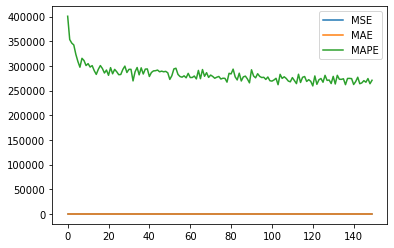

In [16]:
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.plot(history.history['mape'])
plt.legend(['MSE', 'MAE', 'MAPE'])
plt.show()

In [17]:
import math

# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


trainPredict = scaler.inverse_transform(trainPredict).reshape(-1,1)
trainY = scaler.inverse_transform(y_train.reshape(-1,1))

testPredict = scaler.inverse_transform(testPredict).reshape(-1,1)
testY = scaler.inverse_transform(y_test.reshape(-1,1))
# calculate root mean squared error
trainScore = mean_absolute_error(trainY, trainPredict)
print('Train Score: %.2f RMSE' % (trainScore))
testScore = mean_absolute_error(testY, testPredict)
print('Test Score: %.2f RMSE' % (testScore))

ValueError: Found input variables with inconsistent numbers of samples: [16780, 33560]

In [152]:
pd.DataFrame({
    "Real": trainY.reshape(-1),
    "Predicted": trainPredict.reshape(-1)
}).head()

,Real,Predicted
0,127.03000,158.695129
1,17.21330,25.582260
2,4.52738,8.567803
3,287.13700,238.233154
4,102.32000,109.447754


In [153]:
pd.DataFrame({
    "Real": testY.reshape(-1),
    "Predicted": testPredict.reshape(-1)
}).head()

,Real,Predicted
0,366.457,71.592209
1,255.325,47.856079
2,175.602,204.338669
3,366.457,71.592209
4,118.875,28.954613
